In [89]:
import datetime
import numpy as np
import pandas as pd
from wallstreet import Stock, Call, Put
import matplotlib.pyplot as plt
import matplotlib.colors as colors

ticker = "PLTR"

In [90]:
s = Stock(ticker)

In [91]:
hist = s.historical()
hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-16,30.020000,30.440001,27.299999,27.84,27.84,180294300
1,2021-02-17,27.990000,29.730000,27.000000,27.08,27.08,151007000
2,2021-02-18,24.990000,26.309999,24.500000,25.17,25.17,313175100
3,2021-02-19,27.020000,29.959999,26.900000,29.00,29.00,320063700
4,2021-02-22,29.959999,30.190001,27.535999,28.00,28.00,183049500


In [92]:
def collect_option_data(ticker, year, month, day, strict=True):
    """ Collect the option data for the given date """
    
    date = datetime.datetime(year=year, month=month, day=day)

    dates = []
    strikes = []
    prices = []
    prices_pc = []
    
    print(f"Call for year:{year}, month:{month}, day:{day}")

    call_setup = False
    attempts = 0
    while not call_setup and attempts < 10:
        try:
            wc = Call(ticker, d=day, m=month, y=year, strict=strict)
            print("Success!")
            call_setup = True
        except:
            attempts += 1
    attempts = 0

    if call_setup:
        for cdata in wc.data:
            strikes.append(cdata['strike'])
            prices.append(cdata['lastPrice'])
            prices_pc.append(cdata['percentChange'])
            dates.append(date)

    data = pd.DataFrame({'date':dates, 'price':prices, 'strike':strikes})

    return data

In [87]:
def calculate_percent_gains(strike_price, stock_price, call_price, n_calls=1):
    
    gains = (stock_price - strike_price) * 100 * n_calls
    cost = call_price * 100 * n_calls
    
    percent_gains = (gains - cost) / cost
    
    return percent_gains

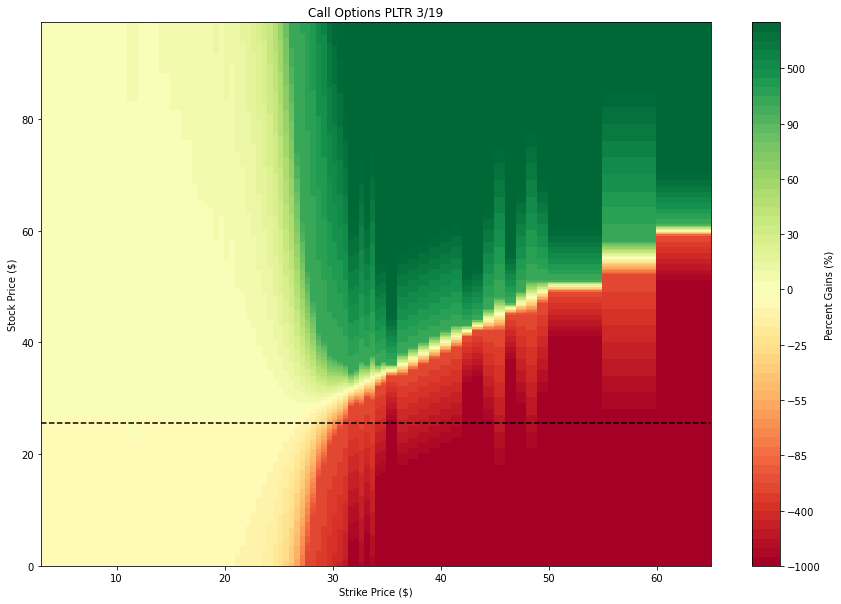

In [97]:
fig, ax = plt.subplots(figsize=(15,10))

# Make data.
strike_price = data['strike']
stock_price = np.arange(0, data['strike'].max() * 1.5, s.price / 100)
call_price_mesh = np.tile(data['price'].T, (len(stock_price), 1))
strike_mesh, stock_mesh = np.meshgrid(strike_price, stock_price)
percent_gains = calculate_percent_gains(strike_mesh, stock_mesh, call_price_mesh, n_calls=1)
                          
# Plot the surface.
pg_min = percent_gains.min()
pg_max = percent_gains.max()
pos_array = np.concatenate((np.arange(0, 100, 5), np.arange(100, 1100, 100)))#, np.arange(1000, 10000, 1000)))
bounds = np.sort(np.concatenate((-1 *pos_array, pos_array)))
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, clip=True)
c = ax.pcolormesh(strike_mesh, stock_mesh, percent_gains, cmap='RdYlGn',
                  norm=norm)

ax.set_title(f'Call Options {ticker} {start_dt.month}/{start_dt.day}')
ax.set_ylabel('Stock Price ($)')
ax.set_xlabel('Strike Price ($)')
cbar = fig.colorbar(c, ax=ax, extend='neither', orientation='vertical')
cbar.set_label('Percent Gains (%)')

ax.axhline(s.price, linestyle='--', color='black')